<a href="https://colab.research.google.com/github/Abu-shanto/Machine-Learning-/blob/main/InceptionV3_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split

# Set the path to your dataset directory
data_dir = "/content/drive/MyDrive/brain_tumor_dataset train"

# List of classes (assuming you have two classes: "tumor" and "non-tumor")
classes = ["/content/drive/MyDrive/brain_tumor_dataset train/yes", "/content/drive/MyDrive/brain_tumor_dataset train/no"]

# Initialize lists to store images and corresponding labels
images = []
labels = []

# Loop through each class folder
for class_name in classes:
    class_path = os.path.join(data_dir, class_name)
    class_label = classes.index(class_name)

    # Loop through images in the class folder
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)

        # Read the image using OpenCV and resize it to a fixed size (e.g., 224x224 for InceptionV3)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (224, 224))

        # Append the image and its label to the lists
        images.append(img)
        labels.append(class_label)

# Convert the lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Split the data into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# Normalize the pixel values to a range of [0, 1]
train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D

# Load the pre-trained InceptionV3 model without the top classification layers
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add a global average pooling layer to reduce the dimensionality of the feature maps
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Create a new model that outputs the feature vectors
feature_extraction_model = Model(inputs=base_model.input, outputs=x)

# Function to extract features from a set of images
def extract_features(images):
    # Preprocess the images to match the format used during training the InceptionV3 model
    preprocessed_images = tf.keras.applications.inception_v3.preprocess_input(images)

    # Extract features using the feature_extraction_model
    features = feature_extraction_model.predict(preprocessed_images)
    return features

# Example usage:
# Replace 'train_images' and 'test_images' with your actual training and testing image datasets
train_features = extract_features(train_images)
test_features = extract_features(test_images)


2/2 [==============================] - 7s 4s/step


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming you have prepared train_features_flattened, train_labels, test_features_flattened, and test_labels from Step 2
# If not, replace them with the actual training and testing data

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest classifier
rf_classifier.fit(train_features_flattened, train_labels)

# Make predictions on the training set
train_predictions = rf_classifier.predict(train_features_flattened)

# Calculate the training accuracy
train_accuracy = accuracy_score(train_labels, train_predictions)
print("Training Accuracy:", train_accuracy)

# Make predictions on the test set
test_predictions = rf_classifier.predict(test_features_flattened)

# Calculate the testing accuracy
test_accuracy = accuracy_score(test_labels, test_predictions)
print("Testing Accuracy:", test_accuracy)



Training Accuracy: 1.0
Testing Accuracy: 0.8235294117647058


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Assuming you have prepared train_features_flattened, train_labels, test_features_flattened, and test_labels from Step 2
# If not, replace them with the actual training and testing data

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Set up the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Train the Random Forest classifier with hyperparameter tuning
grid_search.fit(train_features_flattened, train_labels)

# Get the best hyperparameters found during the search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the Random Forest classifier with the best hyperparameters
best_rf_classifier = RandomForestClassifier(**best_params, random_state=42)
best_rf_classifier.fit(train_features_flattened, train_labels)

# Make predictions on the training set
train_predictions = best_rf_classifier.predict(train_features_flattened)

# Calculate the training accuracy
train_accuracy = accuracy_score(train_labels, train_predictions)
print("Training Accuracy with Best Hyperparameters:", train_accuracy)

# Make predictions on the test set
test_predictions = best_rf_classifier.predict(test_features_flattened)

# Calculate the testing accuracy
test_accuracy = accuracy_score(test_labels, test_predictions)
print("Testing Accuracy with Best Hyperparameters:", test_accuracy)




Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Training Accuracy with Best Hyperparameters: 0.9603960396039604
Testing Accuracy with Best Hyperparameters: 0.8235294117647058


In [ ]:
import cv2
import numpy as np

# Function to load and preprocess a single image
def load_and_preprocess_image(image_path):
    try:
        img = cv2.imread(image_path)
        if img is None:
            raise ValueError(f"Error: Unable to read the image at '{image_path}'.")
        img = cv2.resize(img, (224, 224))
        img = img.astype("float32") / 255.0
        img = np.expand_dims(img, axis=0)  # Add batch dimension
        return img
    except Exception as e:
        print("Error occurred:", str(e))
        return None

# Example usage:
# Replace 'image_path' with the path to your new MRI image
image_path = "/content/drive/MyDrive/brain tumor dataset test/no/40 no.jpg"
new_image = load_and_preprocess_image(image_path)

# Check if the image was loaded and preprocessed successfully
if new_image is not None:
    # Predict using the best trained Random Forest model
    best_rf_classifier = RandomForestClassifier(**best_params, random_state=42)
    best_rf_classifier.fit(train_features_flattened, train_labels)

    # Extract features from the new image using the feature_extraction_model (defined in Step 2)
    new_image_features = extract_features(new_image)
    new_image_features_flattened = new_image_features.reshape(new_image_features.shape[0], -1)

    # Make prediction on the new image
    prediction = best_rf_classifier.predict(new_image_features_flattened)

    # Map the prediction index to the corresponding class label
    classes = ["tumor", "non-tumor"]
    predicted_class = classes[prediction[0]]

    print("Predicted class:", predicted_class)


1/1 [==============================] - 0s 315ms/step
Predicted class: non-tumor


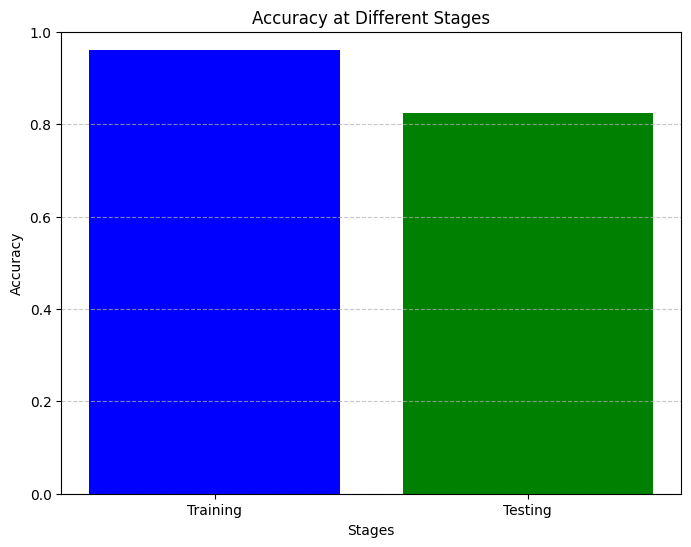

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have trained the Random Forest model and evaluated it on the test set (Step 3)
# Replace these variables with the actual accuracy values from your evaluation
train_accuracy = 0.9603960396039604  # Replace with your training accuracy
test_accuracy = 0.8235294117647058   # Replace with your testing accuracy

# Create data for the accuracy graph
stages = ['Training', 'Testing']
accuracies = [train_accuracy, test_accuracy]

# Plot the accuracy graph
plt.figure(figsize=(8, 6))
plt.bar(stages, accuracies, color=['blue', 'green'])
plt.xlabel('Stages')
plt.ylabel('Accuracy')
plt.ylim(0.0, 1.0)
plt.title('Accuracy at Different Stages')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
import joblib
from tensorflow.keras.models import save_model

# Assuming you've already trained and have the trained Random Forest model (rf_classifier) and the feature_extraction_model (defined in Step 2)

# Save the trained Random Forest model
rf_model_filename = "random_forest_model.joblib"
joblib.dump(rf_classifier, rf_model_filename)
print(f"Random Forest model saved as {rf_model_filename}")

# Save the feature extraction model (InceptionV3)
inceptionv3_model_filename = "inceptionv3_feature_extraction_model.h5"
feature_extraction_model.save(inceptionv3_model_filename)
print(f"InceptionV3 feature extraction model saved as {inceptionv3_model_filename}")


Random Forest model saved as random_forest_model.joblib
InceptionV3 feature extraction model saved as inceptionv3_feature_extraction_model.h5


In [ ]:
import joblib
from tensorflow.keras.models import load_model

# Load the Random Forest model
loaded_rf_model = joblib.load("random_forest_model.joblib")

# Load the feature extraction model (InceptionV3)
loaded_inceptionv3_model = load_model("inceptionv3_feature_extraction_model.h5")

# Now you can use the loaded models for prediction, just like before (Step 5)
# For example, load a new MRI image, preprocess it, extract features, and then make predictions using the loaded models.
